In [257]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import copy
import math

In [258]:
def sigmoid(z):
    z = np.clip( z, -500, 500 )           # protect against overflow
    g = 1.0/(1.0+np.exp(-z))   
    return g

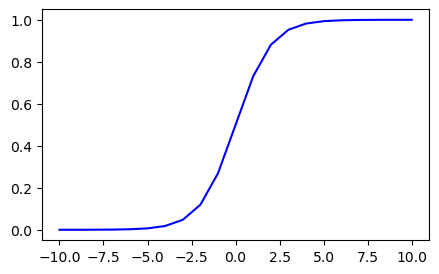

In [259]:
z_tmp = np.arange(-10,11)

y = sigmoid(z_tmp)

_, ax = plt.subplots(1,1,figsize=(5,3))
ax.plot(z_tmp, y, c="b")

In [260]:
X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y = np.array([0, 0, 0, 1, 1, 1])
pos = y == 1
neg = y == 0
print(f'Positive y labels: {pos}')
print(f'Negative y labels: {neg}')
print(f'X values of positive y label: \n{X[pos]}')
print(f'X values of positive y label: \n{X[neg]}')

Positive y labels: [False False False  True  True  True]
Negative y labels: [ True  True  True False False False]
X values of positive y label: 
[[3.  0.5]
 [2.  2. ]
 [1.  2.5]]
X values of positive y label: 
[[0.5 1.5]
 [1.  1. ]
 [1.5 0.5]]


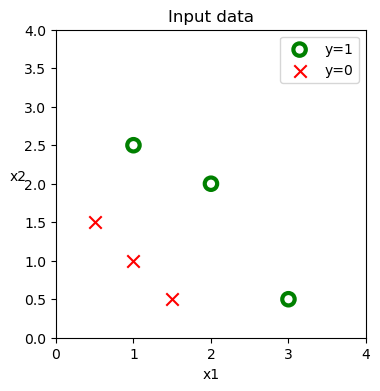

In [327]:
_, ax = plt.subplots(1,1,figsize=(4,4))
ax.scatter(X[pos, 0], X[pos, 1], marker='o', s=80, color='g', label='y=1', lw=3, facecolors='none')
ax.scatter(X[neg, 0], X[neg, 1], marker='x', s=80, color='r', label='y=0')
plt.title('Input data')
plt.xlabel('x1')
plt.ylabel('x2', rotation=0)
ax.axis([0, 4, 0, 4])
ax.legend(loc='best')

# Cost function:

In [262]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    
    for i in range(m):
        z = np.dot(X[i], w) + b
        f_x_i = sigmoid(z)
        cost += y[i] * np.log(f_x_i) + (1 - y[i]) * np.log(1 - f_x_i)
    cost = cost / (-1*m)
    return cost
        

In [263]:
w = np.array([1,1])
b = -3
print(f'Computed cost = {compute_cost(X, y, w, b):.4f}')

Computed cost = 0.3669


In [264]:
def get_line_function(x, w, b):
    line = np.dot(x, w) + b 
    return line

Cost for b = -3 :  1.37733235617021
Cost for b = -4 :  1.5149783425270023


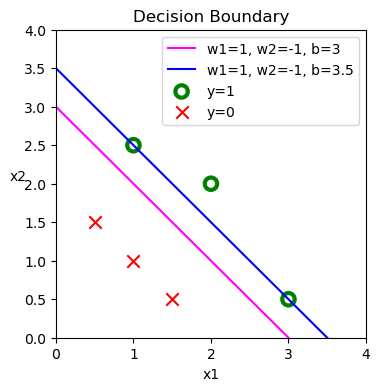

In [265]:
# Model parameters
w = np.array([1, -2])
b_1 = 3
b_2 = 3.5

print("Cost for b = -3 : ", compute_cost(X, y, w, b_1))
print("Cost for b = -4 : ", compute_cost(X, y, w, b_2))

x0 = np.arange(0,6)
x1 = np.arange(0,6)
x = np.c_[x0, x1]

line_1 = get_line_function(x, w, b_1)
line_2 = get_line_function(x, w, b_2)

_, ax = plt.subplots(1,1,figsize=(4,4))
# Plot the decision boundary
ax.plot(x0, line_1, c='magenta', label="w1=1, w2=-1, b=3")
ax.plot(x0, line_2, c='b', label="w1=1, w2=-1, b=3.5")
ax.axis([0, 4, 0, 4])

# Plot the input data
ax.scatter(X[pos, 0], X[pos, 1], marker='o', s=80, color='g', label='y=1', lw=3, facecolors='none')
ax.scatter(X[neg, 0], X[neg, 1], marker='x', s=80, color='r', label='y=0')
plt.title('Input data')
plt.xlabel('x1')
plt.ylabel('x2', rotation=0)
ax.legend(loc='best')

plt.title("Decision Boundary")
plt.show()

# Gradient Descent

In [266]:
def compute_grad(X, y, w, b):
    m, n = X.shape # m - count of input row, n - count of x columns
    dj_dw = np.zeros((n, ))
    dj_db = 0.0
    
    for i in range(m):
        f_x_i = sigmoid(np.dot(X[i],w) + b)
        err = f_x_i - y[i]
        for j in range(n):
            dj_dw[j] += err * X[i, j]
        dj_db += err
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db

In [267]:
X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y = np.array([0, 0, 0, 1, 1, 1])
w = np.array([2., 3.])
b = 1.0
dj_dw_tmp, dj_db_tmp = compute_grad(X, y, w, b)
print(f"dj_dw: {dj_dw_tmp.tolist()}" )
print(f"dj_db: {dj_db_tmp}" )


dj_dw: [0.498333393278696, 0.49883942983996693]
dj_db: 0.49861806546328574


# Gradient descent algorithm

Iteration    0: Cost 2.9268211860885565
Iteration   40: Cost 0.6569613915488799
Iteration   80: Cost 0.49903788085437295
Iteration  120: Cost 0.4507405570708856
Iteration  160: Cost 0.4161439062894627
Iteration  200: Cost 0.38715163873342845
Iteration  240: Cost 0.36171197442470543
Iteration  280: Cost 0.3390611451556822
Iteration  320: Cost 0.3187615559809223
Iteration  360: Cost 0.3004894320442273
Best params: 1.509.x1, 1.260.x2 + (-3.615)


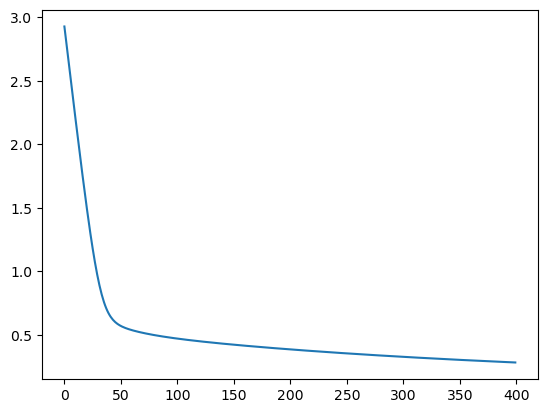

In [288]:
X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y = np.array([0, 0, 0, 1, 1, 1])
w_init = np.array([2., 3.])
b_init = 1.0

w = copy.deepcopy(w_init)
b = copy.deepcopy(b_init)

alpha = 0.1
epochs = 400

cost_history = []
model_history = []

for i in range(epochs):
    dj_dw, dj_db = compute_grad(X, y, w, b)
    
    w = w - alpha * dj_dw
    b = b - alpha * dj_db
    
    cost_history.append(compute_cost(X, y, w, b))
    model_history.append([w, b])
    
    if i% math.ceil(epochs / 10) == 0:
        print(f"Iteration {i:4d}: Cost {cost_history[-1]}")

plt.plot(cost_history)

print('Best params: {w1:.3f}.x1, {w2:.3f}.x2 + ({b:.3f})'.format(w1=model_history[-1][0][0], w2=model_history[-1][0][1], b=model_history[-1][1]))


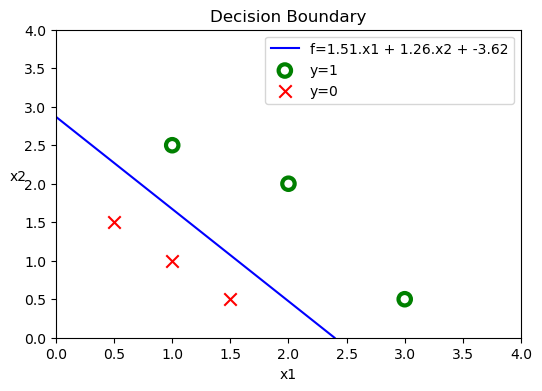

In [289]:
# Model parameters
w, b = model_history[-1]

_, ax = plt.subplots(1,1,figsize=(6,4))
# Plot the decision boundary
ax.plot([0, -b/w[0]], [-b/w[1], 0], c='b', label=f"f={w[0]:.2f}.x1 + {w[1]:.2f}.x2 + ({b:.2f})")
ax.axis([0, 4, 0, 4])

# Plot the input data
ax.scatter(X[pos, 0], X[pos, 1], marker='o', s=80, color='g', label='y=1', lw=3, facecolors='none')
ax.scatter(X[neg, 0], X[neg, 1], marker='x', s=80, color='r', label='y=0')
plt.xlabel('x1')
plt.ylabel('x2', rotation=0)
ax.legend(loc='best')
plt.title("Decision Boundary")
plt.show()

Generating of animation takes some time. Be patient..



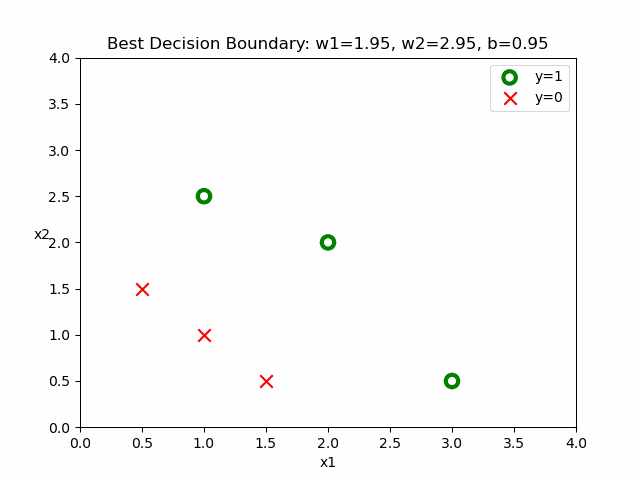

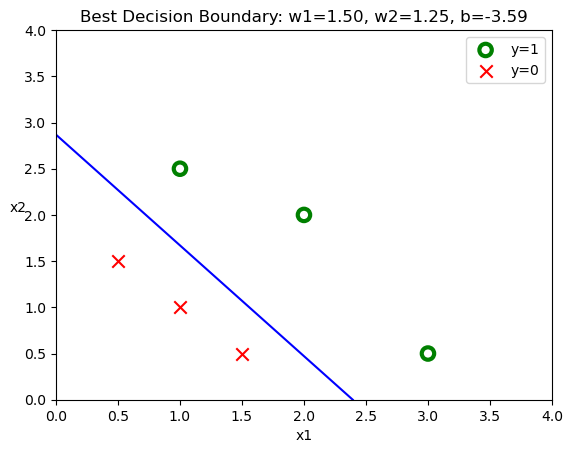

In [326]:
import matplotlib.animation as animation
from IPython.display import HTML
from IPython.display import display

partial_model_parameters = model_history[::5]
# append 100 times the last value from same array to the end of array
[partial_model_parameters.append(partial_model_parameters[-1]) for x in range(100)]
fig, ax = plt.subplots()

line, = ax.plot([], [], lw=2)

ax.set_xlim(0, 3.5)
ax.set_ylim(0, 3)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    ax.clear()
    w, b = partial_model_parameters[i]
    ax.axis([0, 4, 0, 4])
    ax.scatter(X[pos, 0], X[pos, 1], marker='o', s=80, color='g', label='y=1', lw=3, facecolors='none')
    ax.scatter(X[neg, 0], X[neg, 1], marker='x', s=80, color='r', label='y=0')
    line, = ax.plot([0, -b/w[0]], [-b/w[1], 0], c='b')
    plt.title(f"Logistic regression: w1={w[0]:.2f}, w2={w[1]:.2f}, b={b:.2f}")
    plt.xlabel('x1')
    plt.ylabel('x2', rotation=0)
    ax.legend(loc='best')
    return line,

print('Generating of animation takes some time. Be patient..')
ani = animation.FuncAnimation(
    fig, animate, frames=len(partial_model_parameters), init_func=init, blit=True)

ani.save('images/base_of_logistic_regression.gif', writer='pillow', fps=30)

display(HTML(ani.to_jshtml()))

In [ ]:
#If you are displaying this notebook in GitHub, you probably don't see the beautiful animation so here is function to display generated GIF:

from utils import show_gif
show_gif('images/base_of_logistic_regression.gif')